In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [11]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:1+i for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {s:i for i,s in stoi.items()}

In [5]:
# build the dataset 

def build_dataset(words):
    block_size = 3 # context length
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [12]:
C = torch.randn((27,15)) # each letter has a vector embedding of 15

W1 = torch.randn((45,250)) # input: 3 ch window * vector len=15 = 45, output: 250 neurons
b1 = torch.randn(250) 

W2 = torch.randn((250,27)) # input: 250 neurons, output: 27 neurons for each letter
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
    
sum(p.nelement() for p in parameters) # total number of parameters

18682

In [13]:
lossi = []
stepi = []
batch_size = 32

In [16]:
for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix]) 

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

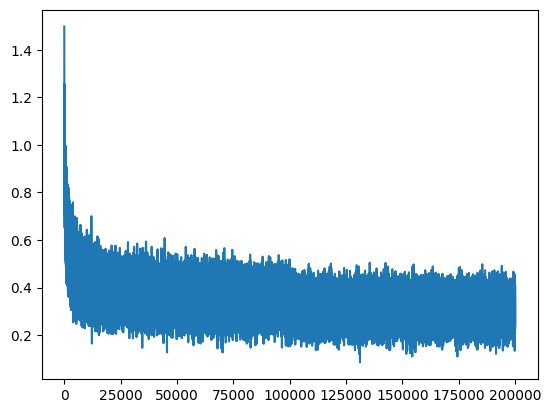

In [17]:
plt.plot(stepi,lossi)

In [19]:
# evaluating the training set loss
emb = C[Xtr] 
h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0812342166900635


In [20]:
# evaluating the dev loss
emb = C[Xdev] 
h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1607792377471924


In [21]:
# evaluating the test loss
emb = C[Xte] 
h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.15948748588562


In [ ]:
# sample from the model
block_size = 3
for _ in range(15):

    out = []
    context = [0] * block_size
    while True:
        enb = C[torch.tensor([context])]
        h = torch.tanh(enb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

dinstiana.
yukisiah.
itz.
drosa.
jamila.
jengunthowieannelian.
gabarisbentzy.
chrianneelee.
davi.
wathrissaya.
lyriq.
jvir.
jaykle.
naroralexyiaj.
ant.
